# Library

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,  classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from scipy import stats
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE

# Function

In [14]:
def convert_to_float(value):
    if isinstance(value, str):  # ตรวจสอบว่าเป็น string
        if value == '-':
            return 0
        else:
            value = value.replace(',', '')
            return float(value)
    else:
        return value  # ไม่ทำอะไรเลยถ้าไม่ใช่ string

# Import DATA SET for train model

In [15]:
Fun = pd.read_csv('2019-2021.csv')
Fun_column =['Total Asset', 'Total Liabilities', 'Paid-up Cap', 'Equity',
       'Revenue', 'Expenses', 'EBITDA', 'EBIT', 'Net Profit', 'EPS',
       'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
       'Net Cash Flow', 'Return on Equity', 'Return on Asset',
       'Gross Profit Margin', 'Net Profit Margin', 'EBIT Margin', 'D/E',
       'Int. Coverage', 'Current Ratio', 'Quick Ratio', 'Fixed Asset',
       'Total Asset.1', 'Inventory Turnover', 'Average Sale Period',
       'Accounts Receivable Turnover', 'Average Collection Period',
       'Account Payable Turnover', 'Average Payment Period', 'Cash Cycle','result']
Fun_column_for_X =   ['Total Asset', 'Total Liabilities', 'Paid-up Cap', 'Equity',
       'Revenue', 'Expenses', 'EBITDA', 'EBIT', 'EPS',
       'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
       'Net Cash Flow', 'Return on Equity', 'Return on Asset',
       'Gross Profit Margin', 'EBIT Margin', 'D/E',
       'Int. Coverage', 'Current Ratio', 'Quick Ratio', 'Fixed Asset',
       'Total Asset.1', 'Inventory Turnover', 'Average Sale Period',
       'Accounts Receivable Turnover', 'Average Collection Period',
       'Account Payable Turnover', 'Average Payment Period', 'Cash Cycle']

In [16]:
Fun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   symbol                        506 non-null    object 
 1   Total Asset                   506 non-null    object 
 2   Total Liabilities             506 non-null    object 
 3   Paid-up Cap                   506 non-null    object 
 4   Equity                        506 non-null    object 
 5   Revenue                       506 non-null    float64
 6   Expenses                      506 non-null    float64
 7   EBITDA                        506 non-null    float64
 8   EBIT                          506 non-null    float64
 9   Net Profit                    506 non-null    float64
 10  EPS                           506 non-null    object 
 11  Operating Cash Flow           506 non-null    float64
 12  Investing Cash Flow           506 non-null    float64
 13  Finan

In [17]:
mask = Fun.applymap(lambda x: x in ['-', 'N/A'])
Fun = Fun[~mask.all(axis=1)]
Fun = Fun.dropna()
Fun = Fun[Fun_column].applymap(convert_to_float)

In [18]:
Fun

,Total Asset,Total Liabilities,Paid-up Cap,Equity,Revenue,Expenses,EBITDA,EBIT,Net Profit,EPS,...,Fixed Asset,Total Asset.1,Inventory Turnover,Average Sale Period,Accounts Receivable Turnover,Average Collection Period,Account Payable Turnover,Average Payment Period,Cash Cycle,result
0,1766506.00,388841.00,449999.00,1379550.00,5413940.00,5233808.00,212118.00,169895.00,133382.00,0.30,...,9.74,2.99,8.39,43.50,15.35,23.78,205.60,1.78,65.49,0
1,1751153.80,1205497.71,1123000.00,534444.16,513424.90,445518.02,70614.77,67906.88,43411.97,0.04,...,81.20,0.30,0.31,1181.46,23.46,15.56,1.99,183.76,1013.25,0
2,1684551.09,826137.43,235000.00,858413.66,1243841.99,1078689.97,181444.42,105044.80,57617.71,0.25,...,1.57,0.80,8.53,42.77,5.54,65.94,6.26,58.33,50.38,0
3,714955.94,501168.81,150000.00,224472.36,1329868.15,1343148.73,7284.58,-11147.08,-15656.35,-0.05,...,4.81,1.95,7.23,50.47,9.15,39.89,26.31,13.87,76.49,0
5,1253647.89,672239.65,300000.00,581408.24,1370503.29,1358546.59,62224.79,17514.81,3263.14,0.01,...,2.54,1.09,4.17,87.55,3.61,101.24,4.91,74.28,114.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,755461.32,183468.09,200000.00,571993.23,558710.77,481609.26,110736.56,77101.51,65206.21,0.18,...,2.63,0.90,4.20,86.87,3.08,118.50,3.84,95.10,110.27,0
501,1280265.44,597895.41,149993.67,682370.02,1809191.02,1665312.15,185678.98,147047.61,108676.21,0.18,...,5.23,1.47,4.06,90.00,5.34,68.29,5.43,67.22,91.07,0
502,1371515.36,237141.15,212382.19,1134374.21,1537514.98,1054578.77,539962.90,482936.21,462294.58,1.09,...,2.83,1.18,7.17,50.88,14.80,24.66,6.96,52.43,23.11,0
504,1469467.02,529104.02,107625.00,940363.01,2261671.09,2139166.70,171707.17,122504.39,97682.14,0.91,...,5.63,1.57,6.43,56.75,6.22,58.71,4.49,81.29,34.16,0


In [19]:
X = Fun[Fun_column_for_X]
y = Fun.result

In [20]:
y.sum()

89

# Split Data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [22]:
print(X_train.shape, X_test.shape)

(295, 30) (127, 30)


In [23]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [24]:
print(X_train.shape, X_test.shape)

(460, 30) (127, 30)


# Grid Search

For Random forest

In [40]:
# สร้างตัวแปรสำหรับการทดสอบค่าพารามิเตอร์ของ RFClassifier
RF_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 1,2,'log2','sqrt']
}
# สร้างโมเดล RFClassifier
RF_model = RandomForestClassifier()
# ใช้ GridSearchCV สำหรับ RFClassifier
RF_grid_search = GridSearchCV(estimator=RF_model, param_grid=RF_param_grid, cv=5, scoring='accuracy',error_score='raise')

# ทำการค้นหาค่าพารามิเตอร์ที่ดีที่สุดสำหรับ RFClassifier
RF_grid_search.fit(X_train, y_train)

# แสดงค่าพารามิเตอร์ที่ดีที่สุดสำหรับ RFClassifier
print("Best Parameters for RFClassifier:", RF_grid_search.best_params_)
print("Best Score for RFClassifier:", RF_grid_search.best_score_)
best_params_RF = RF_grid_search.best_params_

Best Parameters for RFClassifier: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for RFClassifier: 0.9485701212537176


In [41]:
print("All Hyperparameters and Their Values:")
for param, value in RF_grid_search.best_params_.items():
    print(f"{param}= {value},")

All Hyperparameters and Their Values:
max_depth= 10,
max_features= None,
min_samples_leaf= 1,
min_samples_split= 2,
n_estimators= 50,


In [43]:
best_params_RF

{'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [44]:
best_params_RF = {'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

for XGboost

In [45]:
XGram_grid ={
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [None, 0.2,0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5]
}
xgb_model = XGBClassifier()

# สร้าง GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=XGram_grid, cv=5, scoring='accuracy')

# ทำการค้นหาและปรับแต่งพารามิเตอร์
xgb_grid_search.fit(X_train, y_train)

# แสดงค่าพารามิเตอร์ที่ดีที่สุดสำหรับ XGBRFClassifier
print("Best Parameters for XGBRFClassifier:", xgb_grid_search.best_params_)
print("Best Score for XGBRFClassifier:", xgb_grid_search.best_score_)
best_params_XG = xgb_grid_search.best_params_

Best Parameters for XGBRFClassifier: {'colsample_bytree': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}
Best Score for XGBRFClassifier: 0.9463967055593686


In [161]:
print("All Hyperparameters and Their Values:")
for param, value in xgb_grid_search.best_params_.items():
    print(f"{param}= {value},")

All Hyperparameters and Their Values:
colsample_bytree= 0.2,
learning_rate= 0.01,
max_depth= 3,
min_child_weight= 1,
n_estimators= 200,


In [162]:
best_params_XG

{'colsample_bytree': 0.2,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200}

In [91]:
best_params_XG = {'colsample_bytree': None,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 100}

# **Random Forest**

In [25]:
# define the model
RF_model = RandomForestClassifier(max_depth= 30,
max_features= None,
min_samples_leaf= 1,
min_samples_split= 2,
n_estimators= 20,
random_state=42)
# fit the model on the whole dataset

RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=42)
# evaluate the model and collect the scores
n_scores = cross_val_score(RF_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(n_scores)
print("CV_train : %.4f" % n_scores.mean())
print("CV_test : %.4f" % RF_model.score(X_test,y_test))
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy score = {accuracy:.2f}%")

[0.95652174 0.93043478 0.90434783 0.95652174 0.94782609 0.92173913
 0.95652174 0.94782609 0.93043478 0.93913043 0.94782609 0.93913043]
CV_train : 0.9399
CV_test : 0.8740
Accuracy score = 87.40%


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       108
           1       0.84      0.95      0.89        92

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



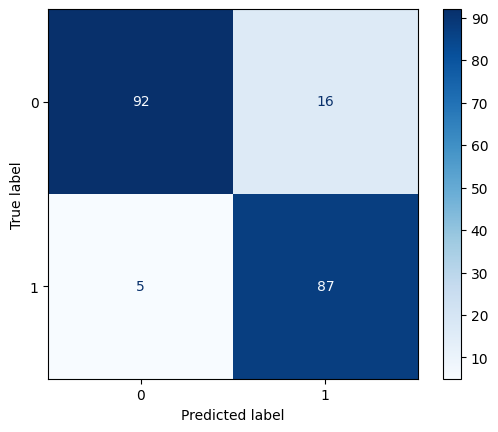

In [32]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

## Overfitting Random forest

In [33]:
print('Training Accuracy : ',
      metrics.accuracy_score(y_train, RF_model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_test, RF_model.predict(X_test))*100)

Training Accuracy :  99.79253112033194
Validation Accuracy :  89.5


# **XGboost**

In [34]:
# define the model
XG_model = XGBClassifier(colsample_bytree= 0.2,
learning_rate= 0.01,
max_depth= 3,
min_child_weight= 1,
n_estimators= 20,
random_state = 42)
# fit the model on the whole dataset
                           
XG_model.fit(X_train, y_train)
y_pred = XG_model.predict(X_test)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=42)
# evaluate the model and collect the scores
n_scores = cross_val_score(XG_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(n_scores)
print("CV_train : %4f" % n_scores.mean())
print("CV_test : %.4f" % XG_model.score(X_test,y_test))
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy score = {accuracy:.2f}%")

[0.9338843  0.95041322 0.93333333 0.95       0.9338843  0.95867769
 0.95       0.91666667 0.96694215 0.92561983 0.925      0.925     ]
CV_train : 0.939118
CV_test : 0.9200
Accuracy score = 92.00%


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       108
           1       0.85      1.00      0.92        92

    accuracy                           0.92       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.92      0.92       200



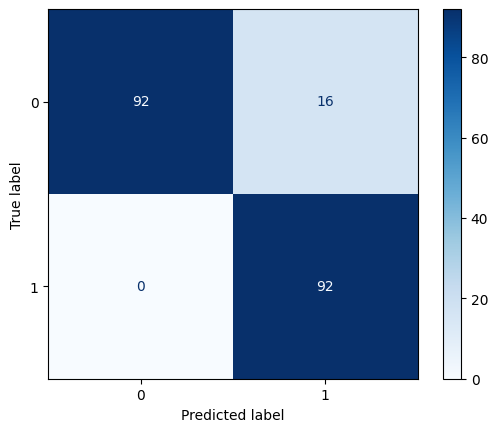

In [36]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=XG_model.classes_).plot(cmap='Blues')

## Overfitting XGboost

In [37]:
print('Training Accuracy : ',
      metrics.accuracy_score(y_train, XG_model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_test, XG_model.predict(X_test))*100)

Training Accuracy :  94.81327800829875
Validation Accuracy :  92.0


# Features selection

Random forest

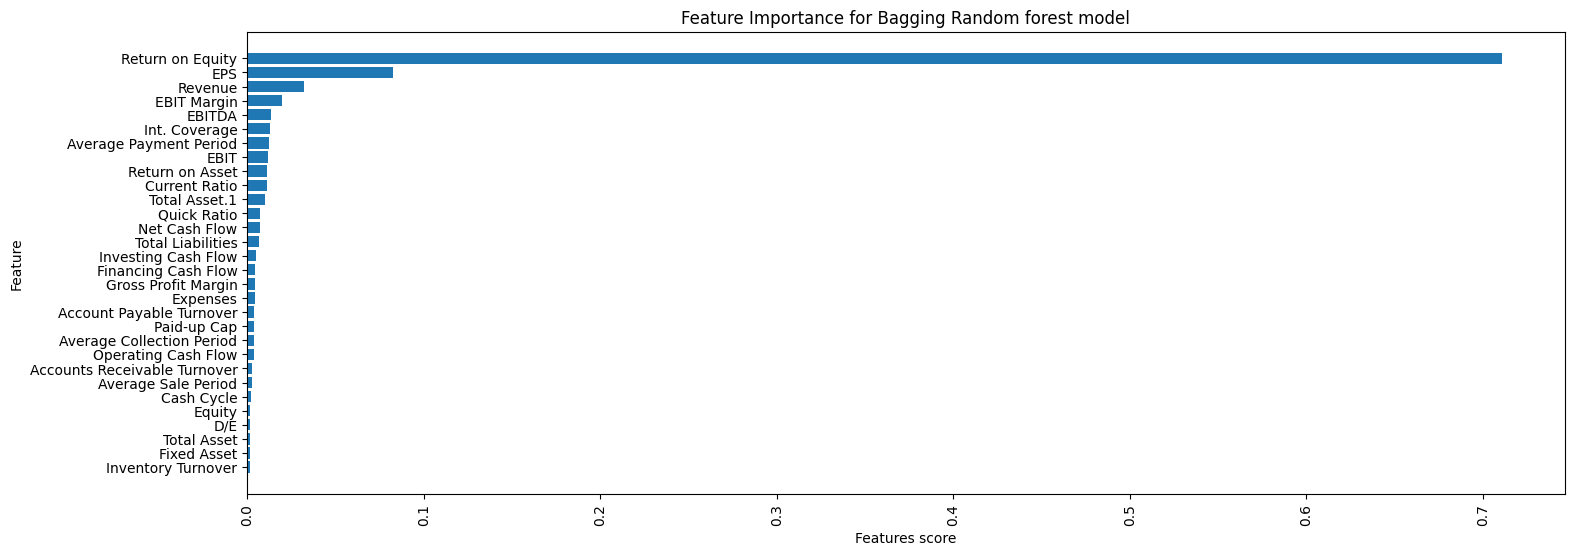

In [38]:
feature_importance = RF_model.feature_importances_

# 3. เก็บค่าความสำคัญ
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

# 4. สร้างกราฟแท่ง
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=False)
sorted_feature_names, sorted_feature_importance = zip(*sorted_feature_importance)
plt.figure(figsize=(17, 6))
plt.barh(sorted_feature_names, sorted_feature_importance)
plt.xticks(rotation=90)
plt.xlabel('Features score')
plt.ylabel('Feature')
plt.title('Feature Importance for Bagging Random forest model')
plt.show()

In [39]:
features_im = RF_model.feature_importances_
sorted_indices = np.argsort(features_im)[::-1]

for index in sorted_indices:
    feature_name = X.columns[index]
    importance = features_im[index]
    print(f"{feature_name} : {importance}")


Return on Equity : 0.7108982588770085
EPS : 0.08266075253336255
Revenue : 0.03224220064167297
EBIT Margin : 0.019583122184237
EBITDA : 0.013525992091683033
Int. Coverage : 0.013093124118906596
Average Payment Period : 0.012390194678066693
EBIT : 0.01169455332782742
Return on Asset : 0.011442229486481641
Current Ratio : 0.010983375748657547
Total Asset.1 : 0.010068372913883837
Quick Ratio : 0.007355995507699087
Net Cash Flow : 0.007179136420221292
Total Liabilities : 0.00675631865629174
Investing Cash Flow : 0.005160135050224768
Financing Cash Flow : 0.004697220055049793
Gross Profit Margin : 0.004679979111520366
Expenses : 0.004410930647319305
Account Payable Turnover : 0.004116135094052747
Paid-up Cap : 0.003853365040748617
Average Collection Period : 0.003763518051242009
Operating Cash Flow : 0.0037046937109320504
Accounts Receivable Turnover : 0.0028442753975182786
Average Sale Period : 0.0026213006851128384
Cash Cycle : 0.001964119677120978
Equity : 0.0018747497099761245
D/E : 0.00

XGBoost

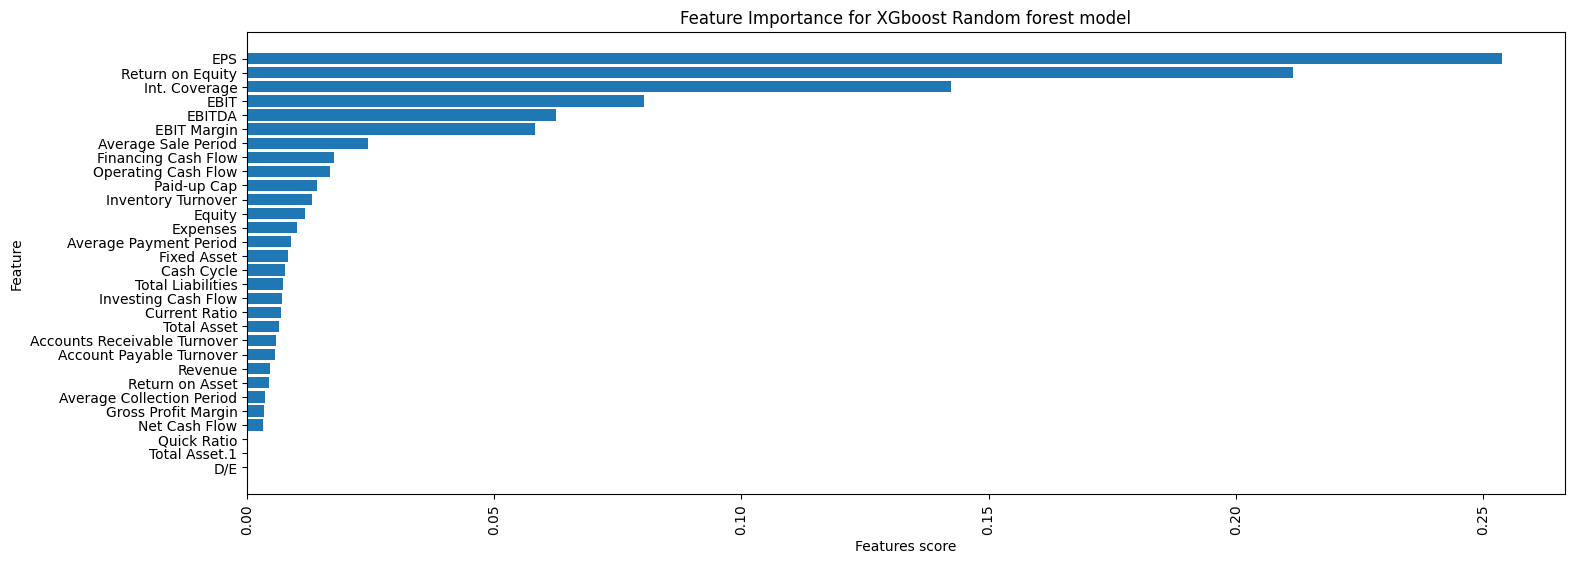

In [40]:
feature_importance = XG_model.feature_importances_

# 3. เก็บค่าความสำคัญ
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

# 4. สร้างกราฟแท่ง
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=False)
sorted_feature_names, sorted_feature_importance = zip(*sorted_feature_importance)
plt.figure(figsize=(17, 6))
plt.barh(sorted_feature_names, sorted_feature_importance)
plt.xticks(rotation=90)
plt.xlabel('Features score')
plt.ylabel('Feature')
plt.title('Feature Importance for XGboost Random forest model')
plt.show()

In [41]:
features_im = XG_model.feature_importances_
sorted_indices = np.argsort(features_im)[::-1]

for index in sorted_indices:
    feature_name = X.columns[index]
    importance = features_im[index]
    print(f"{feature_name} : {importance}")

EPS : 0.2538641095161438
Return on Equity : 0.21166791021823883
Int. Coverage : 0.14239080250263214
EBIT : 0.08020734786987305
EBITDA : 0.06250910460948944
EBIT Margin : 0.05827375501394272
Average Sale Period : 0.02441347762942314
Financing Cash Flow : 0.017592310905456543
Operating Cash Flow : 0.016711752861738205
Paid-up Cap : 0.014228195883333683
Inventory Turnover : 0.013163812458515167
Equity : 0.011760994791984558
Expenses : 0.010142440907657146
Average Payment Period : 0.008911257609724998
Fixed Asset : 0.008363297209143639
Cash Cycle : 0.0075592221692204475
Total Liabilities : 0.007316224742680788
Investing Cash Flow : 0.006971942260861397
Current Ratio : 0.006786308716982603
Total Asset : 0.006424306891858578
Accounts Receivable Turnover : 0.005780564621090889
Account Payable Turnover : 0.005606051068753004
Revenue : 0.004583488684147596
Return on Asset : 0.00441130343824625
Average Collection Period : 0.0036179975140839815
Gross Profit Margin : 0.0034063956700265408
Net Cash

# Correlation

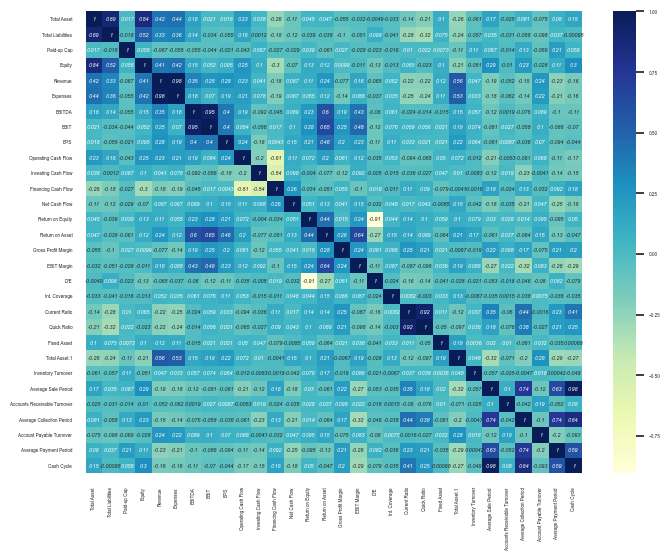

In [42]:
corr = X.corr()
plt.figure(figsize=(8, 6))

annot_kws = {
    "size": 4,  # ขนาดข้อความg
    "fontstyle": "italic"  # รูปแบบตัวอักษร
}
sns.set(font_scale=0.3)
sns.heatmap(corr, cmap="YlGnBu", annot=True, annot_kws=annot_kws)
plt.show()
# 


# Backtest Conclusion metrix

In [6]:
BackBack = pd.read_csv('result.csv')
BackBack.columns

Index(['result', 'logit', 'probit', 'Random forest', 'XGBoost', 'major', '172',
       'recheck logit', 'recheck probit', 'recheck rf', 'recheck xg',
       'recheck major'],
      dtype='object')

In [7]:
BackBack.rename(columns={'major':'majority vote'},inplace=True)

In [ ]:
mj = BackBack['majority vote']

logit
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       108
           1       0.85      0.90      0.87        92

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

probit
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       108
           1       0.79      0.95      0.86        92

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.87      0.86      0.86       200

Random forest
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       108
           1       0.84      0.93      0.89        92

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89    

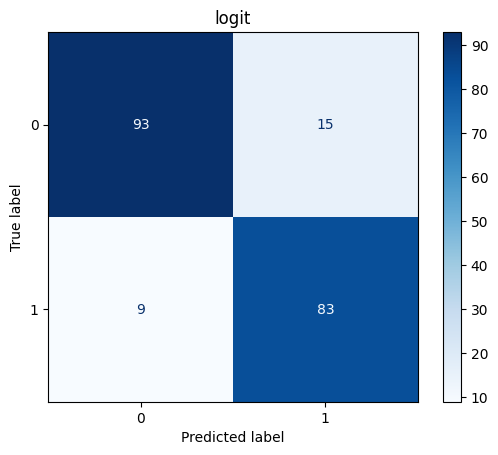

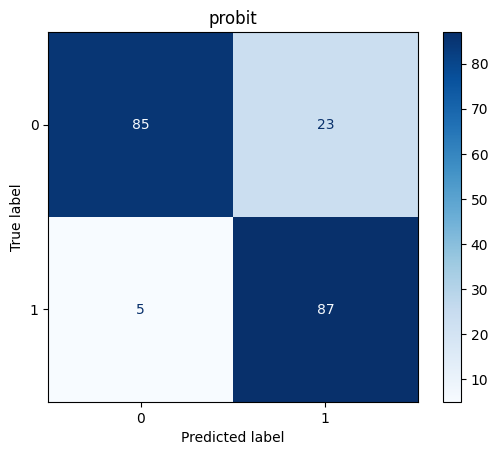

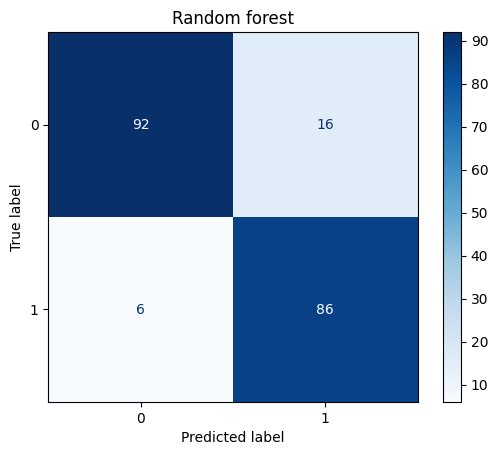

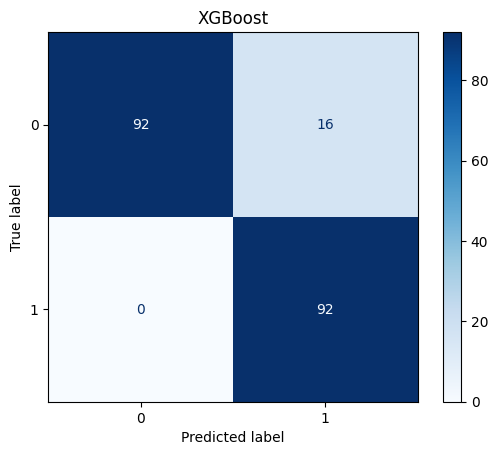

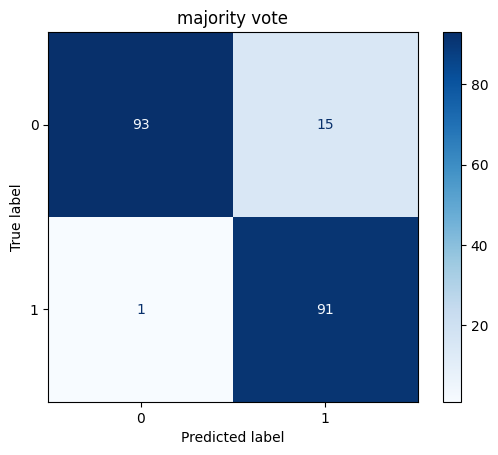

In [8]:
for model in BackBack[['logit', 'probit', 'Random forest', 'XGBoost', 'majority vote']]:
    print(model)
    print(classification_report(BackBack['result'], BackBack[model]))
    cm = confusion_matrix(BackBack['result'], BackBack[model])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
    disp.ax_.set_title(model)